In [2]:
import pandas as pd



In [3]:
file_path = './smartwatches.csv'
dataset = pd.read_csv(file_path,index_col='Unnamed: 0')
dataset.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [4]:
dataset.drop_duplicates(inplace=True)

In [5]:
dataset.columns

Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
       'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
       'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
       'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

In [6]:
dataset.shape

(440, 15)

In [7]:
train_df = dataset.sample(frac=0.8,random_state=42)

In [8]:
test_df= dataset.drop(train_df.index)

In [9]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [10]:
print(f"Training dataset = {train_df.shape} \n\n Testing dataset = {test_df.shape}")

Training dataset = (352, 16) 

 Testing dataset = (88, 16)


In [11]:
train_df.isna().sum()

index                    0
Brand                    0
Current Price            7
Original Price          57
Discount Percentage     57
Rating                   3
Number OF Ratings       48
Model Name              27
Dial Shape              91
Strap Color             91
Strap Material          53
Touchscreen             31
Battery Life (Days)     25
Bluetooth                5
Display Size            26
Weight                 147
dtype: int64

In [12]:
train_df.dtypes

index                    int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [13]:
train_df.info


<bound method DataFrame.info of      index      Brand  Current Price  Original Price  Discount Percentage  \
0      275     garmin        64990.0         82990.0            21.689360   
1       84    ambrane         2368.0          4499.0            47.366081   
2      357    ambrane         1799.0          3799.0            52.645433   
3      265     garmin        33490.0         36990.0             9.462017   
4      337    gizmore         1199.0          4499.0            73.349633   
..     ...        ...            ...             ...                  ...   
347    289     huawei        10990.0         20990.0            47.641734   
348    390  zebronics         2199.0          4999.0            56.011202   
349    347    gizmore         1999.0          5999.0            66.677780   
350    246    amazfit         6999.0          9999.0            30.003000   
351    217     fitbit        14999.0             NaN                  NaN   

     Rating  Number OF Ratings  \
0       4

In [14]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype !='object' ]

In [15]:
continuous_data = [feature for feature in train_df.columns if train_df[feature].dtype =='object' ]

In [16]:
numerical_data

['index',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [17]:
continuous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [18]:
train_df[numerical_data].describe()

index  Current Price  Original Price  Discount Percentage  \
count  352.000000     345.000000      295.000000           295.000000   
mean   225.616477   12226.628986    14163.593220            47.091312   
std    129.558545   16165.849708    15158.287437            24.243852   
min      0.000000    1199.000000     1669.000000           -79.688436   
25%    118.750000    2199.000000     5999.000000            33.017817   
50%    227.000000    3999.000000     7990.000000            52.506563   
75%    337.500000   16999.000000    17999.000000            65.863413   
max    448.000000   89900.000000    96390.000000            91.004550   

           Rating  Number OF Ratings  Battery Life (Days)  
count  349.000000         304.000000           327.000000  
mean     4.013181       12253.371711            14.198012  
std      0.557084       44607.446931             7.776580  
min      1.000000           1.000000             0.750000  
25%      3.900000          65.000000             8.000000  
50%      4.100000         961.500000            17.500000  
75%      4.300000        5978.500000            22.000000  
max      5.000000      619130.000000            22.000000

In [19]:
train_df[numerical_data].corr()

index  Current Price  Original Price  \
index                1.000000      -0.110259       -0.073031   
Current Price       -0.110259       1.000000        0.970037   
Original Price      -0.073031       0.970037        1.000000   
Discount Percentage -0.089718      -0.590105       -0.461361   
Rating              -0.274781       0.392064        0.312889   
Number OF Ratings   -0.131037      -0.143698       -0.125121   
Battery Life (Days)  0.344487       0.014984       -0.118164   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.089718 -0.274781          -0.131037   
Current Price                  -0.590105  0.392064          -0.143698   
Original Price                 -0.461361  0.312889          -0.125121   
Discount Percentage             1.000000 -0.219439           0.200445   
Rating                         -0.219439  1.000000           0.069537   
Number OF Ratings               0.200445  0.069537           1.000000   
Battery Life (Days)            -0.013755 -0.081172           0.050199   

                     Battery Life (Days)  
index                           0.344487  
Current Price                   0.014984  
Original Price                 -0.118164  
Discount Percentage            -0.013755  
Rating                         -0.081172  
Number OF Ratings               0.050199  
Battery Life (Days)             1.000000

In [20]:
train_df[numerical_data].skew()

index                 -0.017077
Current Price          2.299597
Original Price         2.895660
Discount Percentage   -1.007935
Rating                -1.662509
Number OF Ratings      9.656400
Battery Life (Days)   -0.216196
dtype: float64

In [21]:
import ydata_profiling as pp

In [22]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 296.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Understand Your Data with Visualization
1. Univariate Plots
   1. Histograms
   2. Density Plots
   3. Box and Whisker Plots
3. Multivariate Plots
   1. Correlation Matrix Plots
   2. Scatter Plot Matrix

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
numerical_data.remove('index')

In [25]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

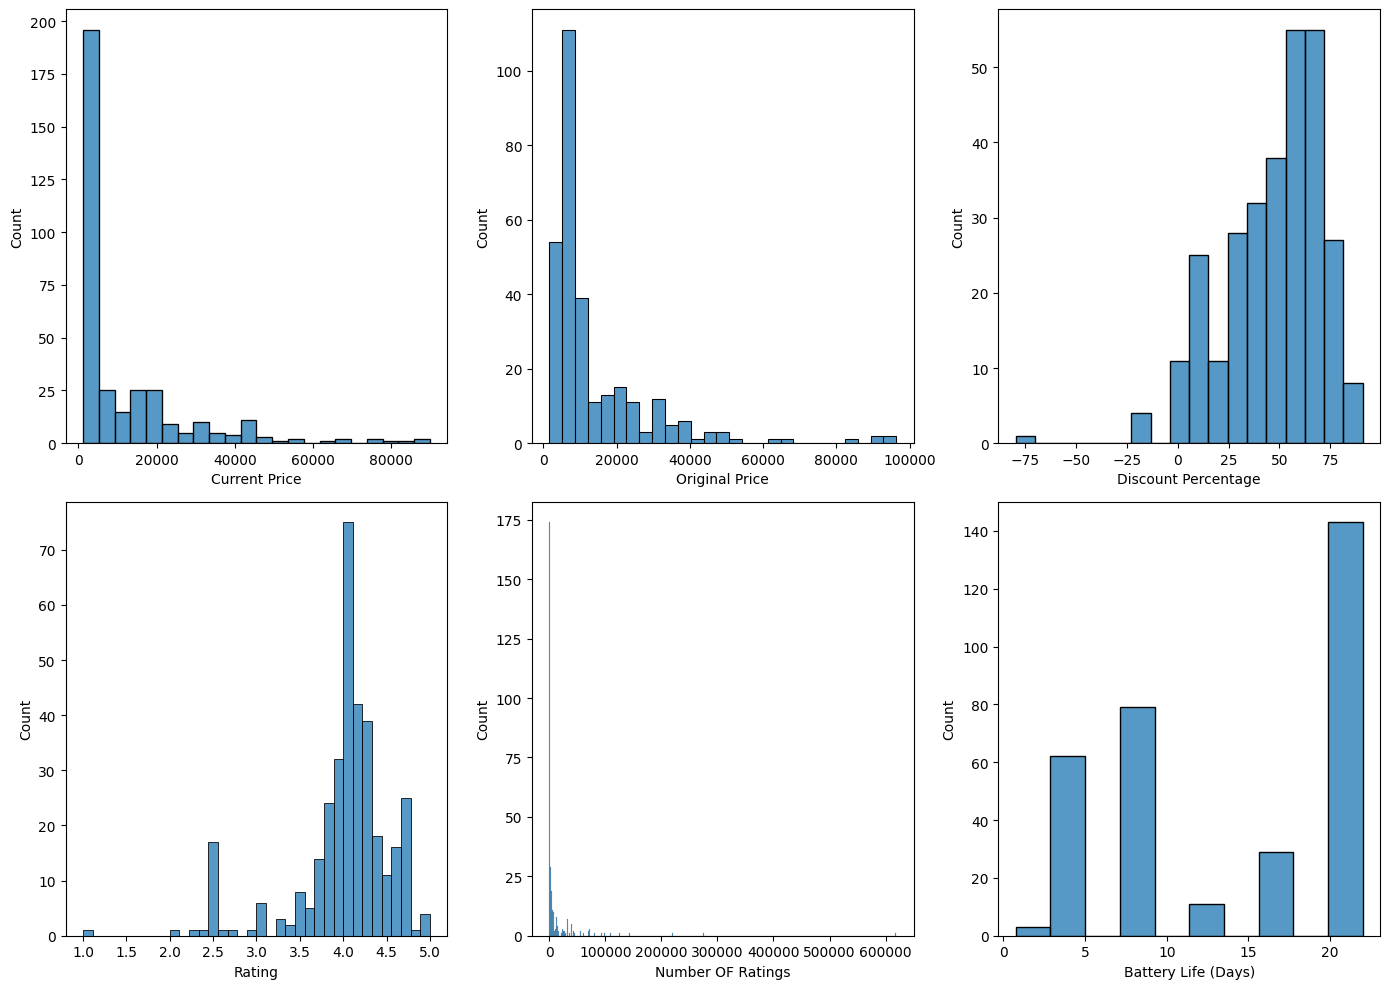

In [26]:
# Histogram
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.histplot(data = train_df[colum],ax= ax)
plt.tight_layout()
plt.show()

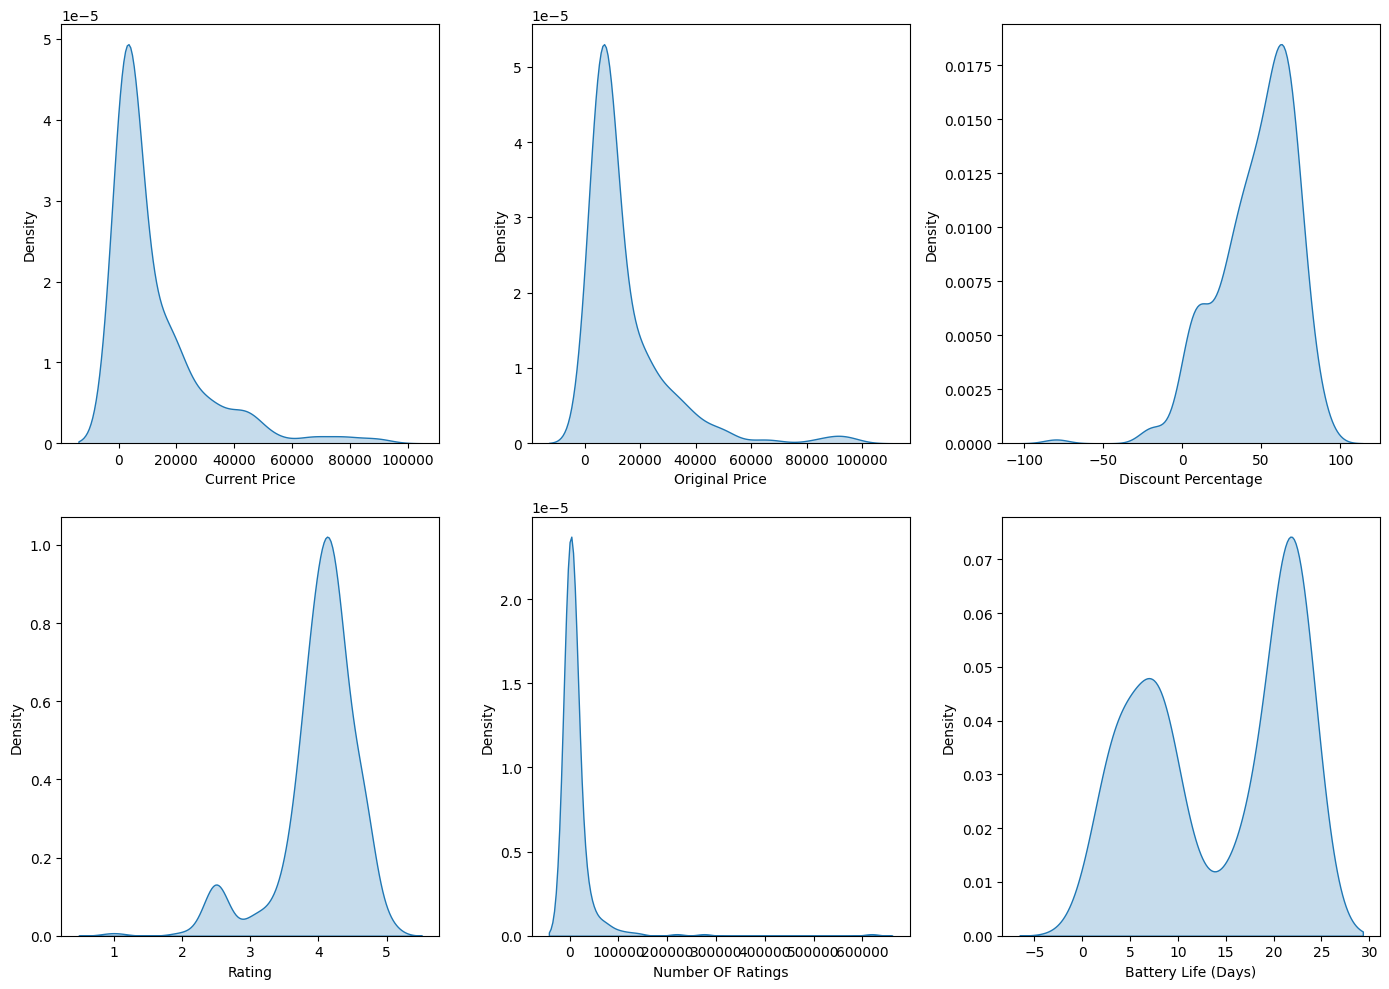

In [27]:
# Density Plots
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.kdeplot(data = train_df[colum],ax= ax,fill=True)
plt.tight_layout()
plt.show()

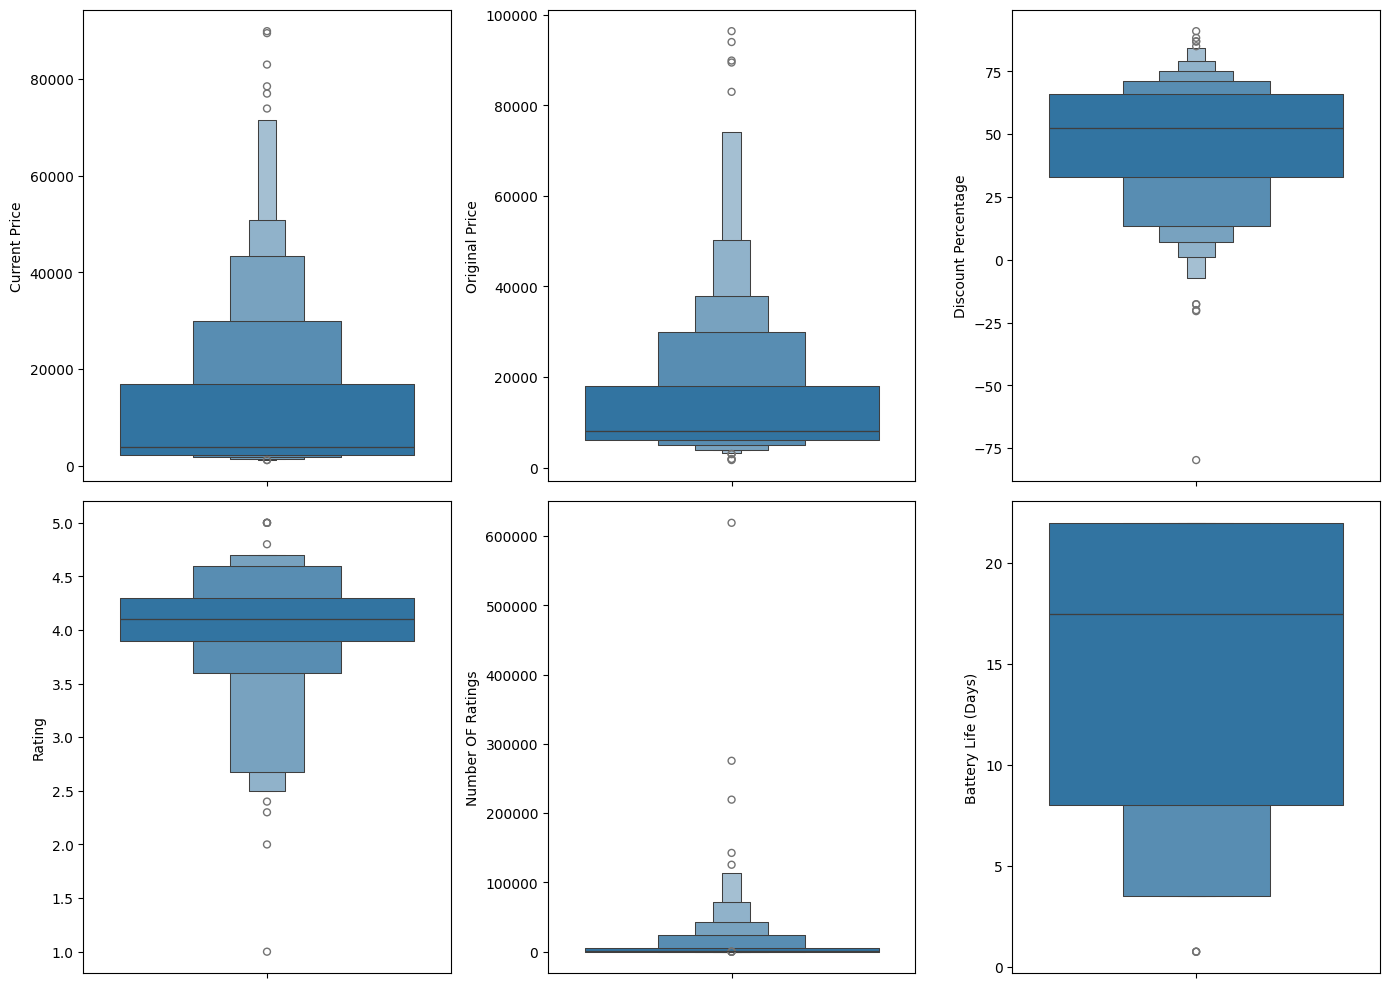

In [28]:
# Boxen
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.boxenplot(data = train_df[colum],ax= ax)
plt.tight_layout()
plt.show()

In [30]:
train_df[numerical_data].describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     345.000000      295.000000           295.000000  349.000000   
mean    12226.628986    14163.593220            47.091312    4.013181   
std     16165.849708    15158.287437            24.243852    0.557084   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2199.000000     5999.000000            33.017817    3.900000   
50%      3999.000000     7990.000000            52.506563    4.100000   
75%     16999.000000    17999.000000            65.863413    4.300000   
max     89900.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         304.000000           327.000000  
mean        12253.371711            14.198012  
std         44607.446931             7.776580  
min             1.000000             0.750000  
25%            65.000000             8.000000  
50%           961.500000            17.500000  
75%          5978.500000            22.000000  
max        619130.000000            22.000000

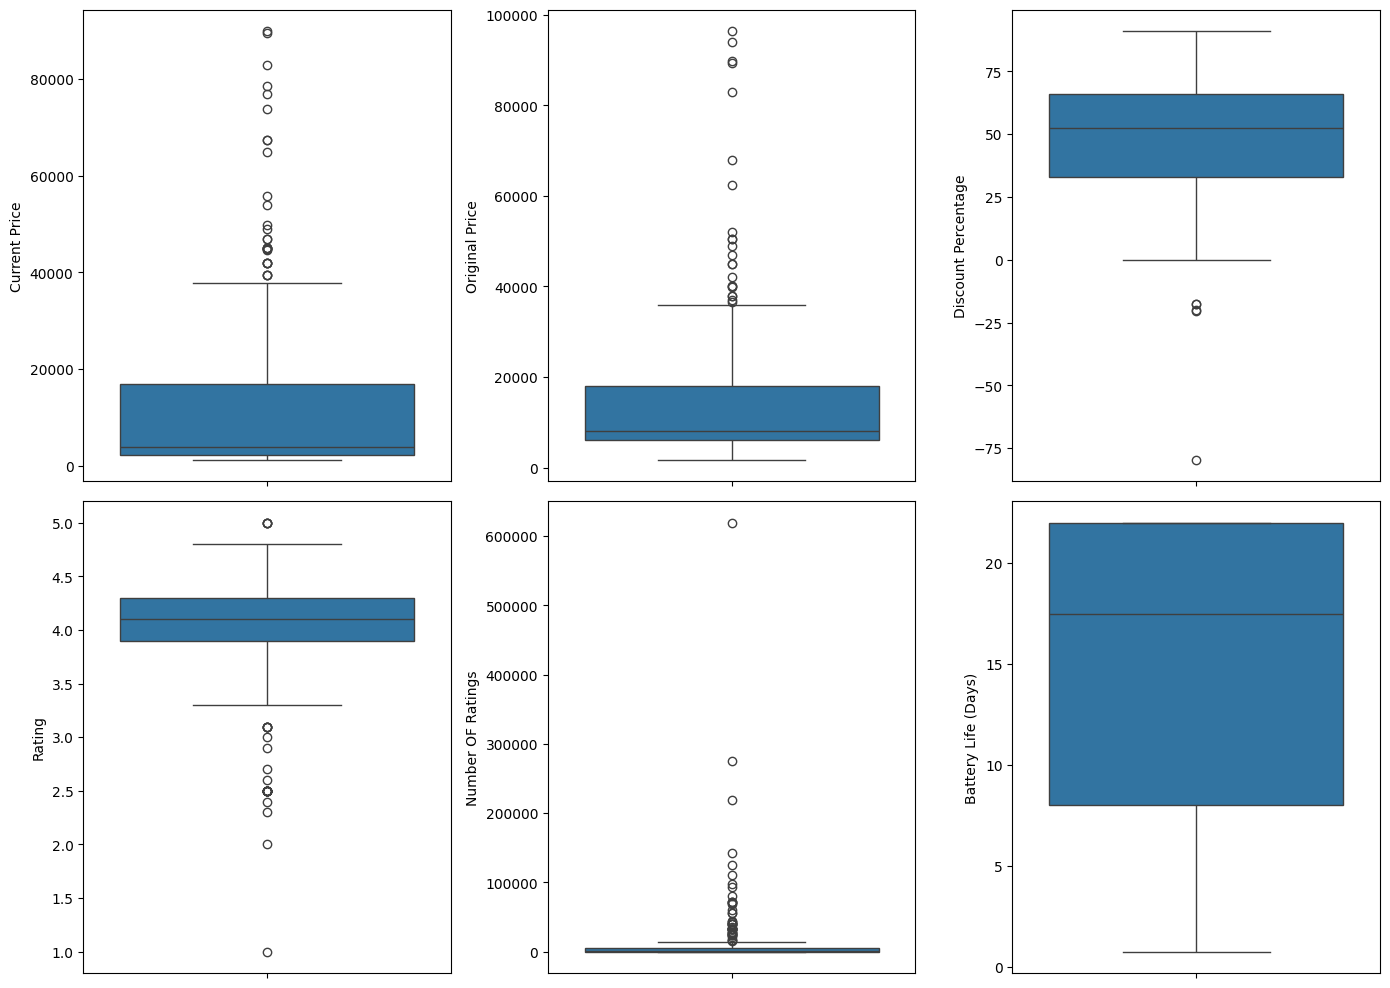

In [31]:
# Box Plot
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))
for i,colum in enumerate(numerical_data):
    row = i//3
    col= i % 3
    ax = axes[row,col]
    sns.boxplot(data = train_df[colum],ax= ax)
plt.tight_layout()
plt.show()

In [ ]:


sns.pairplot(train_df)

In [ ]:
sns.heatmap(train_df[numerical_data].corr(),annot=True)
plt.show(0)